## Lego DataSet Exploratory Data Analysis
### DataSci200 Project 2
#### https://www.kaggle.com/datasets/rtatman/lego-database?resource=download

![alt text](downloads_schema.png "Lego Scema")

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)

In [77]:
# Import Individual Lego DataFrames
colors = pd.read_csv("data/colors.csv.gz")
parts = pd.read_csv("data/parts.csv.gz")
sets = pd.read_csv("data/sets.csv.gz")
themes = pd.read_csv("data/themes.csv.gz")
inventories = pd.read_csv("data/inventories.csv.gz")
inventory_parts = pd.read_csv("data/inventory_parts.csv.gz")
inventory_sets = pd.read_csv("data/inventory_sets.csv.gz")
part_categories = pd.read_csv("data/part_categories.csv.gz")
# Import IMDB data
imdb_titles = pd.read_csv("C:/Users/mhurth/OneDrive - PureWest Energy/Desktop/MIDS/200/title.basics.tsv.gz", sep= "\t")
imdb_ratings = pd.read_csv("C:/Users/mhurth/OneDrive - PureWest Energy/Desktop/MIDS/200/title.ratings.tsv.gz", sep= "\t")
# Import Box Office Data
box_office_numbers = pd.read_csv("data/boxofficemojotopfranchises.tsv", sep= "\t")

C:\Users\mhurth\AppData\Local\Temp\1\ipykernel_17168\622314292.py:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_titles = pd.read_csv("C:/Users/mhurth/OneDrive - PureWest Energy/Desktop/MIDS/200/title.basics.tsv.gz", sep= "\t")


In [78]:
# Filter to years for sets
sets = sets.loc[sets.year <= 2022]
print(f"IMDB is of shape {imdb_titles.shape}")
# Filter start year for imdb data
imdb_titles.loc[imdb_titles["startYear"]=="\\N", "startYear"] = np.nan
imdb_titles.dropna(subset=["startYear"], inplace=True)
imdb_titles["startYear"] = imdb_titles["startYear"].astype(int)
imdb_titles = imdb_titles[(imdb_titles["startYear"] >= 1950) & (imdb_titles["startYear"] <= 2022)]
print(f"IMDB is of shape {imdb_titles.shape} after date filter")

IMDB is of shape (9717486, 9)
IMDB is of shape (8126109, 9) after date filter


In [81]:
# Merging Sets and Themes to look at most common themes over time
sets_and_themes_df = sets.merge(themes, left_on="theme_id", right_on="id", how='left', suffixes=('_set', "_theme"))
sets_and_themes_df = sets_and_themes_df.loc[sets_and_themes_df.year <= 2022]
sets_and_themes_df.head(1000)

,set_num,name_set,year,theme_id,num_parts,img_url,id,name_theme,parent_id
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,1,Technic,NaN
1,0011-2,Town Mini-Figures,1979,67,12,https://cdn.rebrickable.com/media/sets/0011-2.jpg,67,Classic Town,50.0
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0,https://cdn.rebrickable.com/media/sets/0011-3.jpg,199,Lion Knights,186.0
3,0012-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0012-1.jpg,143,Supplemental,126.0
4,0013-1,Space Mini-Figures,1979,143,12,https://cdn.rebrickable.com/media/sets/0013-1.jpg,143,Supplemental,126.0
5,0014-1,Space Mini-Figures,1979,143,2,https://cdn.rebrickable.com/media/sets/0014-1.jpg,143,Supplemental,126.0
6,0015-1,Space Mini-Figures,1979,143,18,https://cdn.rebrickable.com/media/sets/0015-1.jpg,143,Supplemental,126.0
7,0016-1,Castle Mini Figures,1979,189,15,https://cdn.rebrickable.com/media/sets/0016-1.jpg,189,Classic Castle,186.0
8,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,https://cdn.rebrickable.com/media/sets/002-1.jpg,1,Technic,NaN
9,002253963-1,Legend of Chima: Corbeaux et Gorilles,2013,497,4,https://cdn.rebrickable.com/media/sets/0022539...,497,Books,NaN


In [82]:
theme_count = pd.DataFrame(sets_and_themes_df.name_theme.value_counts())
theme_count.columns = ["Count"]
theme_count.head(1000)

,Count
Star Wars,872
Technic,839
Key Chain,674
Books,598
Friends,520
Gear,481
Basic Set,473
Ninjago,459
Bionicle,435
Supplemental,435


In [83]:
theme_count.sort_index().head(1000)

,Count
12V,52
4 Juniors,23
4.5V,86
9V,100
Action Wheelers,9
Advent,6
Adventurers,1
Agents,13
Airlines,16
Airport,55


##### Some observations of the theme Data
Many themes could be grouped into superthemes like: 
- Aquaraiders
- Blacktron
- Space 
- Dinosaurs
- Disney
- Knights
- Jurrassic Park
- Matoran, Ninja
- Pirates, Planet
- Indiana Jones (Raiders of lost Ark, Temple of Doom,)
- Minifigures
- Spider-Man
- Star Wars
- The Lord of the Rings (The Fellowship of the Ring, The Hobbit, The Lord of the Rings, The Return of the King, The Two Towers)
- Toa
- Western

These grouping may be key to elucidating some of the trends with time and films so we will use the parent them going forward. We will need to impute the parent theme accordingly

In [84]:
# Parent_id is empty for the parents
sets_and_themes_df.isna().sum()

set_num          0
name_set         0
year             0
theme_id         0
num_parts        0
img_url          0
id               0
name_theme       0
parent_id     9157
dtype: int64

In [85]:
sets_and_themes_df.parent_id = sets_and_themes_df.parent_id.fillna(sets_and_themes_df.id)
sets_and_themes_df.isna().sum()

set_num       0
name_set      0
year          0
theme_id      0
num_parts     0
img_url       0
id            0
name_theme    0
parent_id     0
dtype: int64

In [86]:
id_themes = sets_and_themes_df[["id","name_theme"]].drop_duplicates()
id_themes

,id,name_theme
0,1,Technic
1,67,Classic Town
2,199,Lion Knights
3,143,Supplemental
7,189,Classic Castle
9,497,Books
10,366,Basic Set
16,453,Technic
25,652,Playhouse
26,505,Basic Set


In [87]:
sets_and_themes_df = sets_and_themes_df.merge(id_themes, left_on="parent_id", right_on="id", suffixes=("","_parent"))
sets_and_themes_df.drop(columns=["id_parent"],inplace=True)
sets_and_themes_df.rename(columns={"name_theme_parent":"parent_theme"}, inplace=True)
sets_and_themes_df.head(1000)

,set_num,name_set,year,theme_id,num_parts,img_url,id,name_theme,parent_id,parent_theme
0,001-1,Gears,1965,1,43,https://cdn.rebrickable.com/media/sets/001-1.jpg,1,Technic,1.0,Technic
1,002-1,4.5V Samsonite Gears Motor Set,1965,1,3,https://cdn.rebrickable.com/media/sets/002-1.jpg,1,Technic,1.0,Technic
2,1030-1,TECHNIC I: Simple Machines Set,1985,1,210,https://cdn.rebrickable.com/media/sets/1030-1.jpg,1,Technic,1.0,Technic
3,1038-1,ERBIE the Robo-Car,1985,1,120,https://cdn.rebrickable.com/media/sets/1038-1.jpg,1,Technic,1.0,Technic
4,1039-1,Manual Control Set 1,1986,1,39,https://cdn.rebrickable.com/media/sets/1039-1.jpg,1,Technic,1.0,Technic
5,1061-1,Single Disk Pack,2000,20,0,https://cdn.rebrickable.com/media/sets/1061-1.jpg,20,Throwbot Slizer,1.0,Technic
6,1237-1,Honda Promotional Set,2001,1,56,https://cdn.rebrickable.com/media/sets/1237-1.jpg,1,Technic,1.0,Technic
7,1257-1,Trike Buggy,1999,1,30,https://cdn.rebrickable.com/media/sets/1257-1.jpg,1,Technic,1.0,Technic
8,1258-1,Propellor Buggy,1999,1,29,https://cdn.rebrickable.com/media/sets/1258-1.jpg,1,Technic,1.0,Technic
9,1259-1,Motorbike,1999,1,28,https://cdn.rebrickable.com/media/sets/1259-1.jpg,1,Technic,1.0,Technic


In [88]:
theme_count = pd.DataFrame(sets_and_themes_df.parent_theme.value_counts())
theme_count.columns = ["Count"]
theme_count

,Count
Gear,3091
Duplo,1261
Star Wars,889
Collectible Minifigures,803
City,792
Service Packs,781
Town,764
Educational and Dacta,646
Books,606
Technic,540


The below plot shows the most common themes by number of sets included within the theme

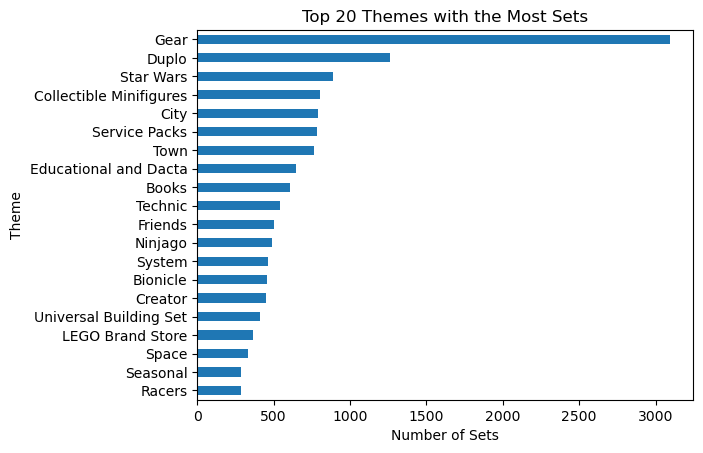

In [89]:
theme_count[:20].plot.barh(legend=False)
plt.ylabel("Theme")
plt.xlabel("Number of Sets")
plt.title("Top 20 Themes with the Most Sets")
plt.gca().invert_yaxis()
plt.show()

In [90]:
# Most Popular Theme By Year
counts_by_year_by_theme = sets_and_themes_df[["year", "parent_theme","set_num"]].groupby(["year", "parent_theme"]).count().sort_values(by="year").reset_index()
counts_by_year_by_theme["max_sets"] = counts_by_year_by_theme[["year", "set_num"]].groupby("year").transform(max)
max_counts_by_year_by_theme = counts_by_year_by_theme[counts_by_year_by_theme.set_num == counts_by_year_by_theme.max_sets]
max_counts_by_year_by_theme

,year,parent_theme,set_num,max_sets
0,1949,System,5,5
1,1950,System,6,6
2,1953,System,4,4
3,1954,System,14,14
6,1955,System,35,35
7,1956,System,16,16
10,1957,System,20,20
12,1958,System,57,57
13,1959,System,4,4
14,1960,System,1,1


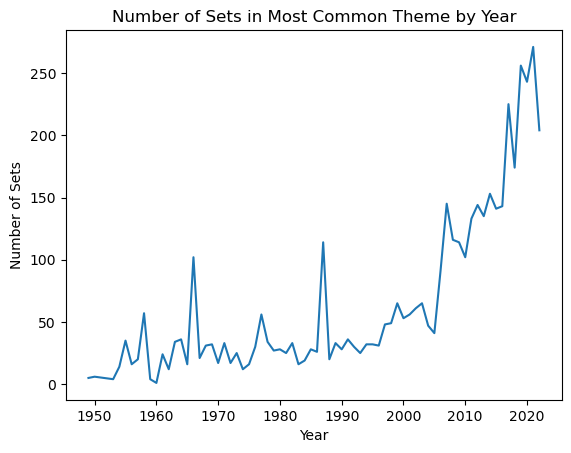

In [91]:
sns.lineplot(data=max_counts_by_year_by_theme, x="year", y="max_sets")
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.title("Number of Sets in Most Common Theme by Year")
plt.show()

C:\Users\mhurth\AppData\Local\Temp\1\ipykernel_17168\683201041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  max_counts_by_year_by_theme.rename(columns={"parent_theme":"Theme"}, inplace=True)


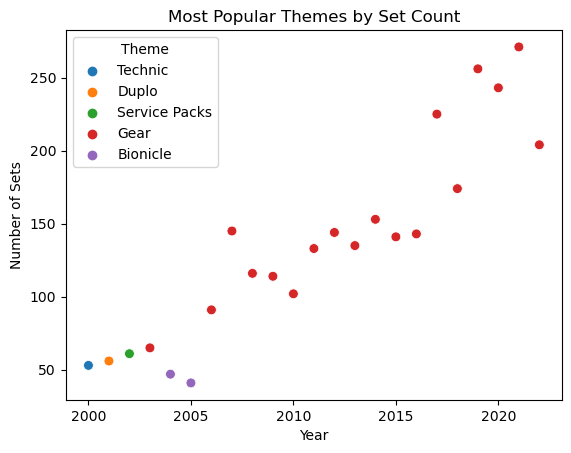

In [92]:
max_counts_by_year_by_theme.rename(columns={"parent_theme":"Theme"}, inplace=True)
max_counts_by_year_by_theme_since_2000 = max_counts_by_year_by_theme[max_counts_by_year_by_theme.year >= 2000]
sns.scatterplot(data=max_counts_by_year_by_theme_since_2000, x="year", y="max_sets", hue="Theme", s=50)
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.title("Most Popular Themes by Set Count")
plt.show()

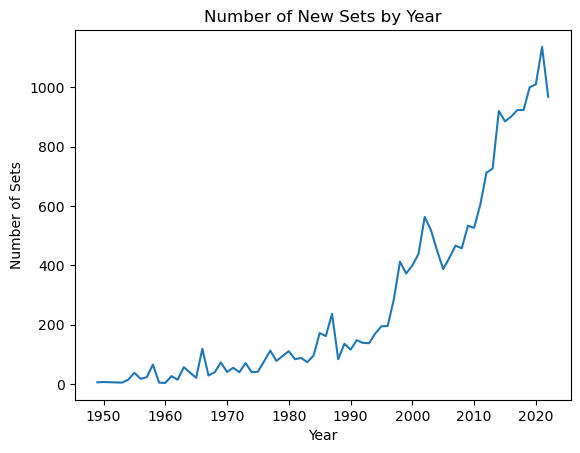

In [93]:
sets = sets.loc[sets.year <= 2022]
new_sets_by_year = sets[["year","set_num"]].groupby(["year"]).count().reset_index()
sns.lineplot(data=new_sets_by_year, x="year", y="set_num")
plt.xlabel("Year")
plt.ylabel("Number of Sets")
plt.title("Number of New Sets by Year")
plt.show()

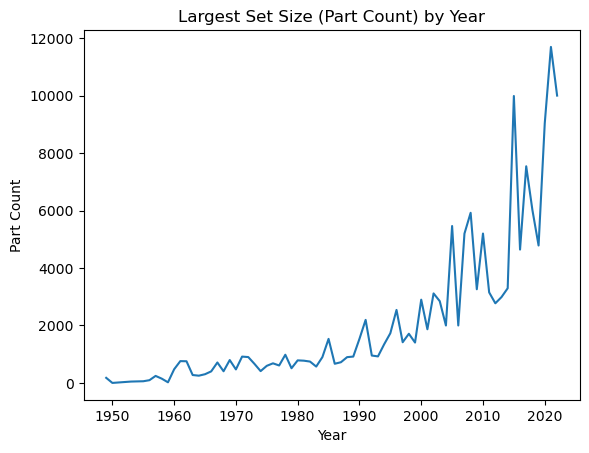

In [94]:
max_part_number_by_year = sets.groupby("year")["num_parts"].max()
max_part_number_by_year.plot()
plt.xlabel("Year")
plt.ylabel("Part Count")
plt.title("Largest Set Size (Part Count) by Year")
plt.show()

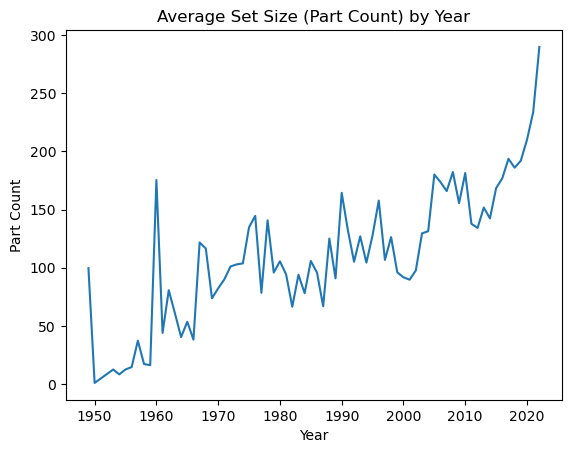

In [95]:
avg_part_number_by_year = sets.groupby("year")["num_parts"].mean()
avg_part_number_by_year.plot()
plt.xlabel("Year")
plt.ylabel("Part Count")
plt.title("Average Set Size (Part Count) by Year")
plt.show()

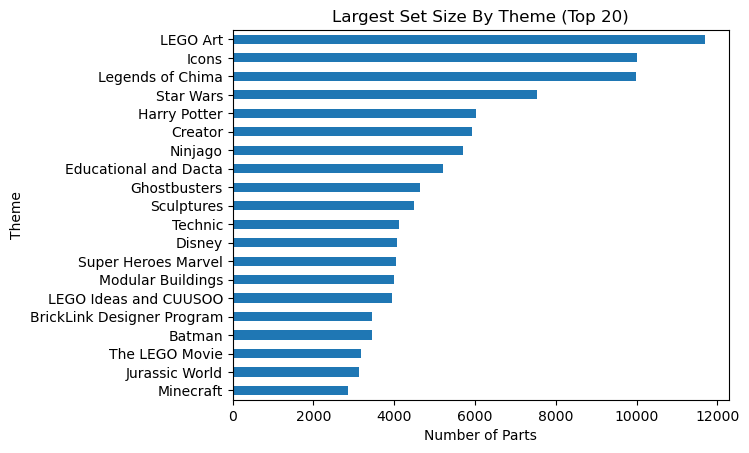

In [96]:
max_parts_by_theme = sets_and_themes_df.groupby("parent_theme")["num_parts"].max().sort_values(ascending=False)
max_parts_by_theme[0:20].plot.barh()
plt.ylabel("Theme")
plt.xlabel("Number of Parts")
plt.title("Largest Set Size By Theme (Top 20)")
plt.gca().invert_yaxis()
plt.show()

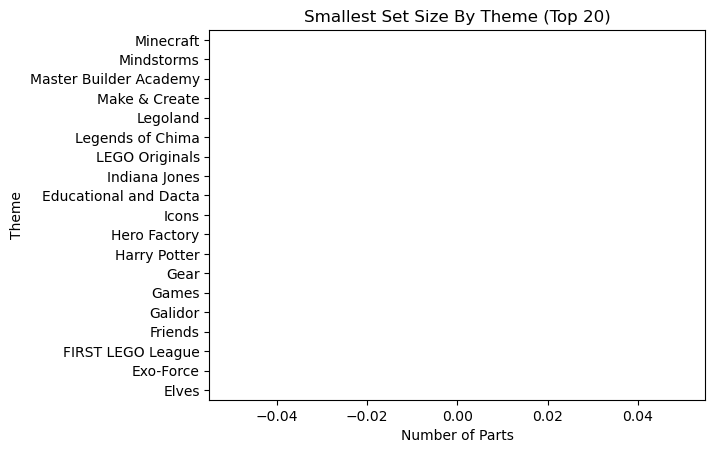

In [97]:
min_parts_by_theme = sets_and_themes_df.groupby("parent_theme")["num_parts"].min().sort_values(ascending=False)
min_parts_by_theme[-20:-1].plot.barh()
plt.ylabel("Theme")
plt.xlabel("Number of Parts")
plt.title("Smallest Set Size By Theme (Top 20)")
plt.gca().invert_yaxis()
plt.show()

<AxesSubplot:>

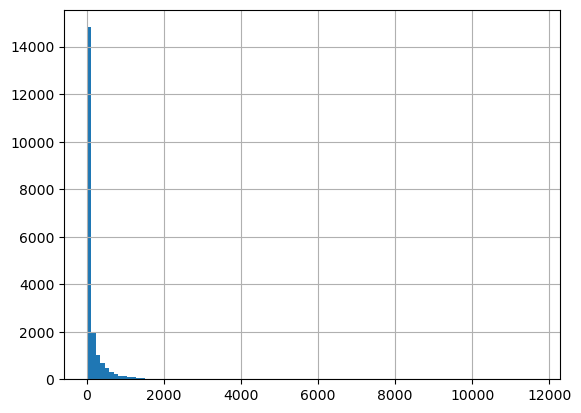

In [98]:
sets_and_themes_df["num_parts"].hist(bins=100)

In [99]:
theme_count.sort_index()

,Count
4 Juniors,54
Advent,56
Agents,28
Alpha Team,31
Angry Birds,6
Aquazone,37
Architecture,59
Atlantis,24
Avatar,4
Avatar: The Last Airbender,2


#### Movie Related Themes
- Star Wars
- Harry Potter
- The Hobbit/The Lord of the Rings
- Pirates Of The Caribean
- Teenage Mutant Ninja Turtles
- Indiana Jones
- Jurrasic World
- The Lone Ranger
- The Lego Movie 
- Avatar
- Batman
- Prince of Persia

In [25]:
imdb_titles.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
11636,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,\N,\N,"Action,Crime"
13082,tt0013274,movie,Istoriya grazhdanskoy voyny,Istoriya grazhdanskoy voyny,0,2021,\N,133,Documentary
15178,tt0015414,movie,La tierra de los toros,La tierra de los toros,0,2000,\N,60,\N
15486,tt0015724,movie,Dama de noche,Dama de noche,0,1993,\N,102,"Drama,Mystery,Romance"
21274,tt0021617,movie,Arizona Territory,Arizona Territory,0,1950,\N,56,Western


For IMDB data I am only interested in movies overlapping with the lego data sets and Movies or TV
- Filter out by year
- filter out by titleType

A big assumption here is that I am only looking at box office feature films and not short, videos, tv, and streaming content associated with these franchises

In [26]:
# imdb_titles["titleType"].unique()
imdb_titles = imdb_titles.loc[imdb_titles["titleType"] == "movie"]
print(f"IMDB is of shape {imdb_titles.shape} after movie filter")

IMDB is of shape (473015, 9) after movie filter


In [74]:
theme_imdb = imdb_titles[imdb_titles["primaryTitle"].str.contains(r'\blord of the rings\b', regex=True, case=False)]
theme_imdb

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
76239,tt0077869,movie,The Lord of the Rings,The Lord of the Rings,0,1978,\N,132,"Adventure,Animation,Fantasy"
117839,tt0120737,movie,The Lord of the Rings: The Fellowship of the Ring,The Lord of the Rings: The Fellowship of the Ring,0,2001,\N,178,"Action,Adventure,Drama"
161622,tt0167260,movie,The Lord of the Rings: The Return of the King,The Lord of the Rings: The Return of the King,0,2003,\N,201,"Action,Adventure,Drama"
161623,tt0167261,movie,The Lord of the Rings: The Two Towers,The Lord of the Rings: The Two Towers,0,2002,\N,179,"Action,Adventure,Drama"
1027407,tt10107410,movie,Music of the Lord of the Rings,Music of the Lord of the Rings,0,2019,\N,59,Documentary
1888912,tt11656828,movie,J.R.R. Tolkien and the Birth of Lord of the Rings,J.R.R. Tolkien and the Birth of Lord of the Rings,0,2004,\N,60,Documentary
3358815,tt14364910,movie,Darla's Book Club: Discussing the Lord of the ...,Darla's Book Club: Discussing the Lord of the ...,0,2021,\N,49,Family
6404105,tt26863616,movie,How They Adapted Lord of the Rings (the good one),How They Adapted Lord of the Rings (the good one),0,2022,\N,\N,Documentary
6759807,tt3342322,movie,The Lord of the Rings Symphony,The Lord of the Rings Symphony,0,2003,\N,105,Music
9668324,tt9810488,movie,The Lord of the Rings - The Appendices Part 1:...,The Lord of the Rings - The Appendices Part 1:...,0,2002,\N,200,Documentary


In [64]:
franchise_dict = {"Star Wars": {"regex": r'\bstar wars\b', 
                               "movies": ["Star Wars: Episode IV - A New Hope", 
                                          "Star Wars: Episode V - The Empire Strikes Back", 
                                          "Star Wars: Episode VI - Return of the Jedi", 
                                          "Star Wars: Episode I - The Phantom Menace",
                                          "Star Wars: Episode II - Attack of the Clones",
                                          "Star Wars: Episode III - Revenge of the Sith",
                                          "Star Wars: Episode VII - The Force Awakens",
                                          "Star Wars: Episode VIII - The Last Jedi",
                                          "Star Wars: Episode IX - The Rise of Skywalker",
                                          "Solo: A Star Wars Story",
                                          "Rogue One: A Star Wars Story",
                                          "Solo: A Star Wars Story"]},
                  "Harry Potter": {"regex": r'\bharry potter\b', 
                                  "movies":["Harry Potter and the Sorcerer's Stone",
                                            "Harry Potter and the Chamber of Secrets",
                                            "Harry Potter and the Prisoner of Azkaban",
                                            "Harry Potter and the Goblet of Fire",
                                            "Harry Potter and the Order of the Phoenix",
                                            "Harry Potter and the Half-Blood Prince",
                                            "Harry Potter and the Deathly Hallows: Part 1",
                                            "Harry Potter and the Deathly Hallows: Part 2"]}}

In [67]:
def null_years_to_zero(df, df_imdb):
    min_year = np.min(df_imdb["startYear"])
    max_year = np.max(df_imdb["startYear"])
    df = df.set_index('year')
    df_new = pd.DataFrame({"year":range(min_year-5,min(2022,max_year+5)), "set_num": 0}).set_index("year")
    df_new["set_num"]=df["set_num"]
    df_new.fillna(0, inplace=True)
    df_new.reset_index(inplace=True)
    return df_new

In [70]:
def plot_movies_and_lego_sets(lego_df, imdb_df, movie_dict, name):
    pattern = movie_dict[name]["regex"]
    movie_list = movie_dict[name]["movies"]
    lego = lego_df.loc[lego_df["parent_theme"].str.contains(pattern, regex=True, case=False)]
    lego = pd.DataFrame(lego.groupby("year")["set_num"].count()).reset_index()
    imdb = imdb_df[imdb_df["primaryTitle"].isin(movie_list)].sort_values(by="startYear").reset_index()
    cmap = plt.cm.get_cmap('hsv', len(imdb))
    for i in range(len(imdb)):
        year = imdb.loc[i, "startYear"]
        title = imdb.loc[i, "primaryTitle"]
        color = cmap(i)
        plt.axvline(x=year, c=color, label=f"{year}: {title}")
    lego = null_years_to_zero(lego, imdb)
    sns.lineplot(data=lego, x="year", y="set_num", marker="o")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.ylabel("Number of Sets")
    plt.xlabel("Year")
    plt.title("Number of Lego Sets by Year with Movie Releases")
    plt.show()

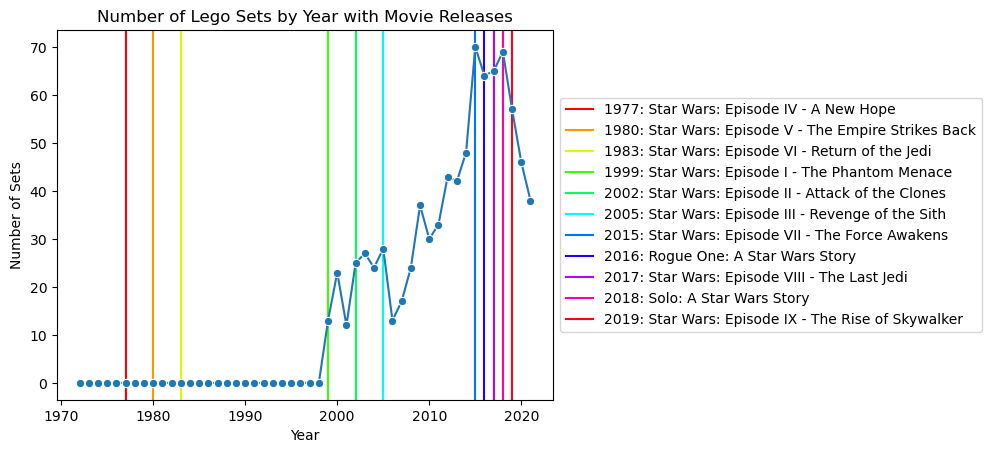

In [71]:
plot_movies_and_lego_sets(sets_and_themes_df, imdb_titles, franchise_dict, "Star Wars")

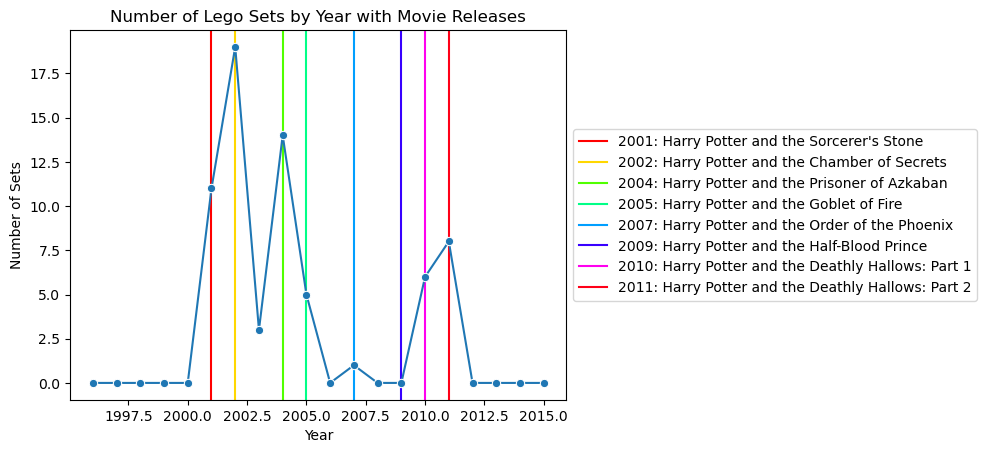

In [72]:
plot_movies_and_lego_sets(sets_and_themes_df, imdb_titles, franchise_dict, "Harry Potter")

In [100]:
themes.loc[themes["name"].str.contains(r'lord', regex=True, case=False)]

,id,name,parent_id
307,561,The Hobbit and Lord of the Rings,NaN
309,566,The Lord of the Rings,561.0
